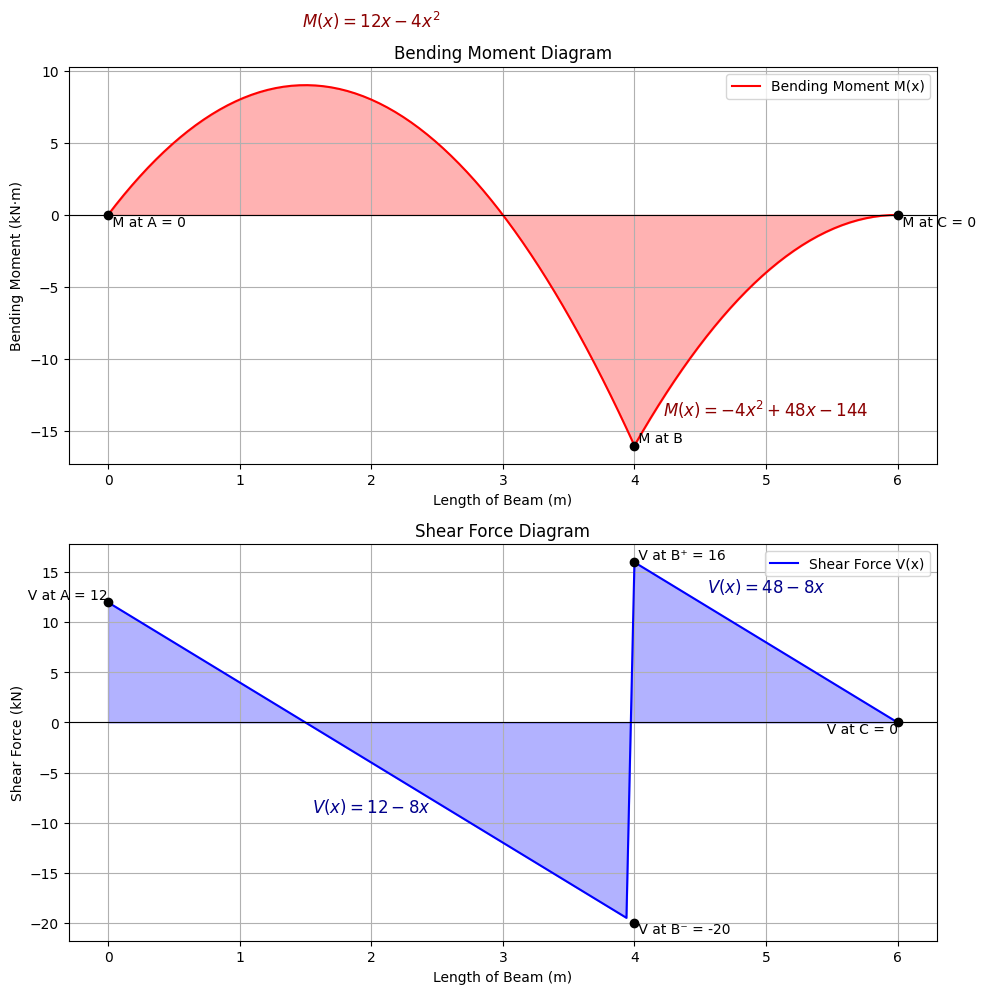

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
w = 8    # kN/m (uniformly distributed load)
L1 = 4   # m (distance from A to B)
L2 = 2   # m (distance from B to C)
L = L1 + L2  # total length of beam
RA = 12  # kN (reaction at A)
RB = 36  # kN (reaction at B)

# Discretized x values along the beam
x = np.linspace(0, L, 100)

# Define the piecewise bending moment function:
# For 0 ≤ x < L1:  M(x)=RA*x - (w*x^2)/2  => 12x - 4x^2
# For L1 ≤ x ≤ L:  M(x)=RA*x - (w*x^2)/2 + RB*(x-L1)
M = np.piecewise(x, [x < L1, x >= L1],
                  [lambda x: RA * x - (w * x**2) / 2, 
                   lambda x: RA * x - (w * x**2) / 2 + RB * (x - L1)])

# Define the piecewise shear force function:
# For 0 ≤ x < L1:  V(x)=RA - w*x  => 12 - 8x
# For L1 ≤ x ≤ L:  V(x)=RA - w*x + RB  => 12 - 8x + 36 = 48 - 8x
V = np.piecewise(x, [x < L1, x >= L1],
                 [lambda x: RA - w * x, 
                  lambda x: RA - w * x + RB])

# Create subplots: one for moment, one for shear
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))


# -------------------------
# Shear Force Diagram
# -------------------------
ax2.plot(x, V, label="Shear Force V(x)", color='blue')
ax2.fill_between(x, V, color='blue', alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_title("Shear Force Diagram")
ax2.set_xlabel("Length of Beam (m)")
ax2.set_ylabel("Shear Force (kN)")
ax2.grid(True)
ax2.legend()

# Calculate shear values at key points
V_A = RA              # at x = 0: 12 kN
V_B_left = RA - w * L1        # just before support B: 12 - 8*4 = -20 kN
V_B_right = RA - w * L1 + RB    # just after support B: 12 - 32 + 36 = 16 kN
V_C = RA - w * L + RB  # at x = L: 12 - 48 + 36 = 0 kN

# Mark key points for shear (noting the jump at B)
ax2.scatter([0, L1, L1, L], [V_A, V_B_left, V_B_right, V_C], color='black', zorder=3)
ax2.text(0, V_A, "  V at A = 12", verticalalignment='bottom', horizontalalignment='right')
ax2.text(L1, V_B_left, " V at B⁻ = -20", verticalalignment='top', horizontalalignment='left')
ax2.text(L1, V_B_right, " V at B⁺ = 16", verticalalignment='bottom', horizontalalignment='left')
ax2.text(L, V_C, "  V at C = 0", verticalalignment='top', horizontalalignment='right')

# Annotate the shear equations on each segment
# For 0 ≤ x < L1, at x=2
x_poly1_s = 2
V_poly1 = RA - w * x_poly1_s  # 12 - 8*2 = -4
ax2.text(x_poly1_s, V_poly1 - 5, r'$V(x)=12-8x$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# For L1 ≤ x ≤ L, at x=5:
x_poly2_s = 5
V_poly2 = RA - w * x_poly2_s + RB  # 12 - 40 + 36 = 8
ax2.text(x_poly2_s, V_poly2 + 5, r'$V(x)=48-8x$', 
         horizontalalignment='center', fontsize=12, color='darkblue')

# -------------------------
# Bending Moment Diagram
# -------------------------
ax1.plot(x, M, label="Bending Moment M(x)", color='red')
ax1.fill_between(x, M, color='red', alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_title("Bending Moment Diagram")
ax1.set_xlabel("Length of Beam (m)")
ax1.set_ylabel("Bending Moment (kN·m)")
ax1.grid(True)
ax1.legend()

# Key moment values at supports (A, B, C)
M_A = 0
M_B = RA * L1 - (w * L1**2) / 2  # at x = L1 (support B)
M_C = 0
ax1.scatter([0, L1, L], [M_A, M_B, M_C], color='black', zorder=3)
ax1.text(0, M_A, " M at A = 0", verticalalignment='top')
ax1.text(L1, M_B, " M at B", verticalalignment='bottom')
ax1.text(L, M_C, " M at C = 0", verticalalignment='top')

# Annotate the moment equations on each segment
# For 0 ≤ x < L1, at x=2
x_poly1 = 2
M_poly1 = RA * x_poly1 - (w * x_poly1**2) / 2  # 12*2 - 4*2^2 = 24 - 16 = 8
ax1.text(x_poly1, M_poly1 + 5, r'$M(x)=12x-4x^2$', 
         horizontalalignment='center', fontsize=12, color='darkred')

# For L1 ≤ x ≤ L, at x=5:
x_poly2 = 5
M_poly2 = RA * x_poly2 - (w * x_poly2**2) / 2 + RB * (x_poly2 - L1)
# Simplifies to: -4x^2 + 48x - 144  (for RA=12, w=8, RB=36, L1=4)
ax1.text(x_poly2, M_poly2 - 10, r'$M(x)=-4x^2+48x-144$', 
         horizontalalignment='center', fontsize=12, color='darkred')


plt.tight_layout()
plt.show()
